# Monitor your outputs!

As an Machine Learning Engineer, I prioritize monitoring the **outputs** of a machine learning model or service. If you monitor the outputs, you can be sure that any change you detect is actually affecting users. So implementing it should be your first priority.



### Example application
Let's take the popurlar Iris dataset as our example. You trained a model and now want to put it in
production:

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Data
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df_train, df_test = train_test_split(iris, stratify=iris["target"], random_state=0)

# Train Model
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(df_train.drop("target", axis=1), df_train["target"]==1.0);

In [2]:
# create a bigger dataset by upsampling
num_data_points=7*60*24
df_test=df_test.sample(num_data_points,random_state=4,replace=True)

prediction= pd.Series(rf_clf.predict_proba(df_test.drop("target",axis=1))[:,1])
prediction.index=pd.date_range("2022-01-01", periods= num_data_points, freq="min")

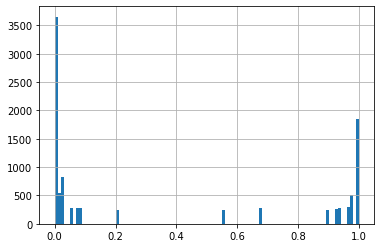

In [3]:
# visualize predictions
prediction.hist(bins=100);

## Monitoring a classification


### Option a) monitor the share of positive predictions with an uppper and lower bound


#### Plot the percentage over time
You need to know if your predictions are typically stable over the day and week. If they are, you can pick a
simple threshold.

In [4]:
import matplotlib.pyplot as plt
# you decided that you get the best precision-recall tradeoff for 
# your problem at 0.8 (making it up here, not actually based on the dataset)
your_threshold=0.8


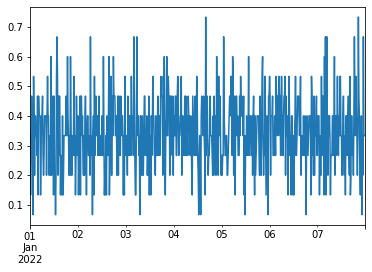

In [5]:
# real time prediction with a small time range (as small as you can get away with considering your amount of traffic)
(prediction>your_threshold).resample("15min").mean().plot();
# this looks very noisy! if you have that little traffic (1 req/min), you can only alert on a very rough rule,
# e.g. rejection ==0 or rejection >0.7

In [6]:

#-> here you see that the share of positive predictions fluctuates between 0.30 and 0.38 
# you could alert if the share is below 0.28 or above .40

In [7]:
## Option b) Use a statistical test

In [8]:
## Monitoring a classication output

In [9]:
### Option a) Use a simple heuristic

You are interested how often your service predicts each iris type and expect the share to be pretty contant over time.
In this case you can use a simple heuristic

SyntaxError: invalid syntax (1584633398.py, line 3)

In [ ]:
pd.Series(rf_clf.predict(df_test.drop("target",axis=1))).value_counts(normalize=True)